<a href="https://colab.research.google.com/github/anushk218/codealpha/blob/main/task_1_iris_flower_classification(codealpha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


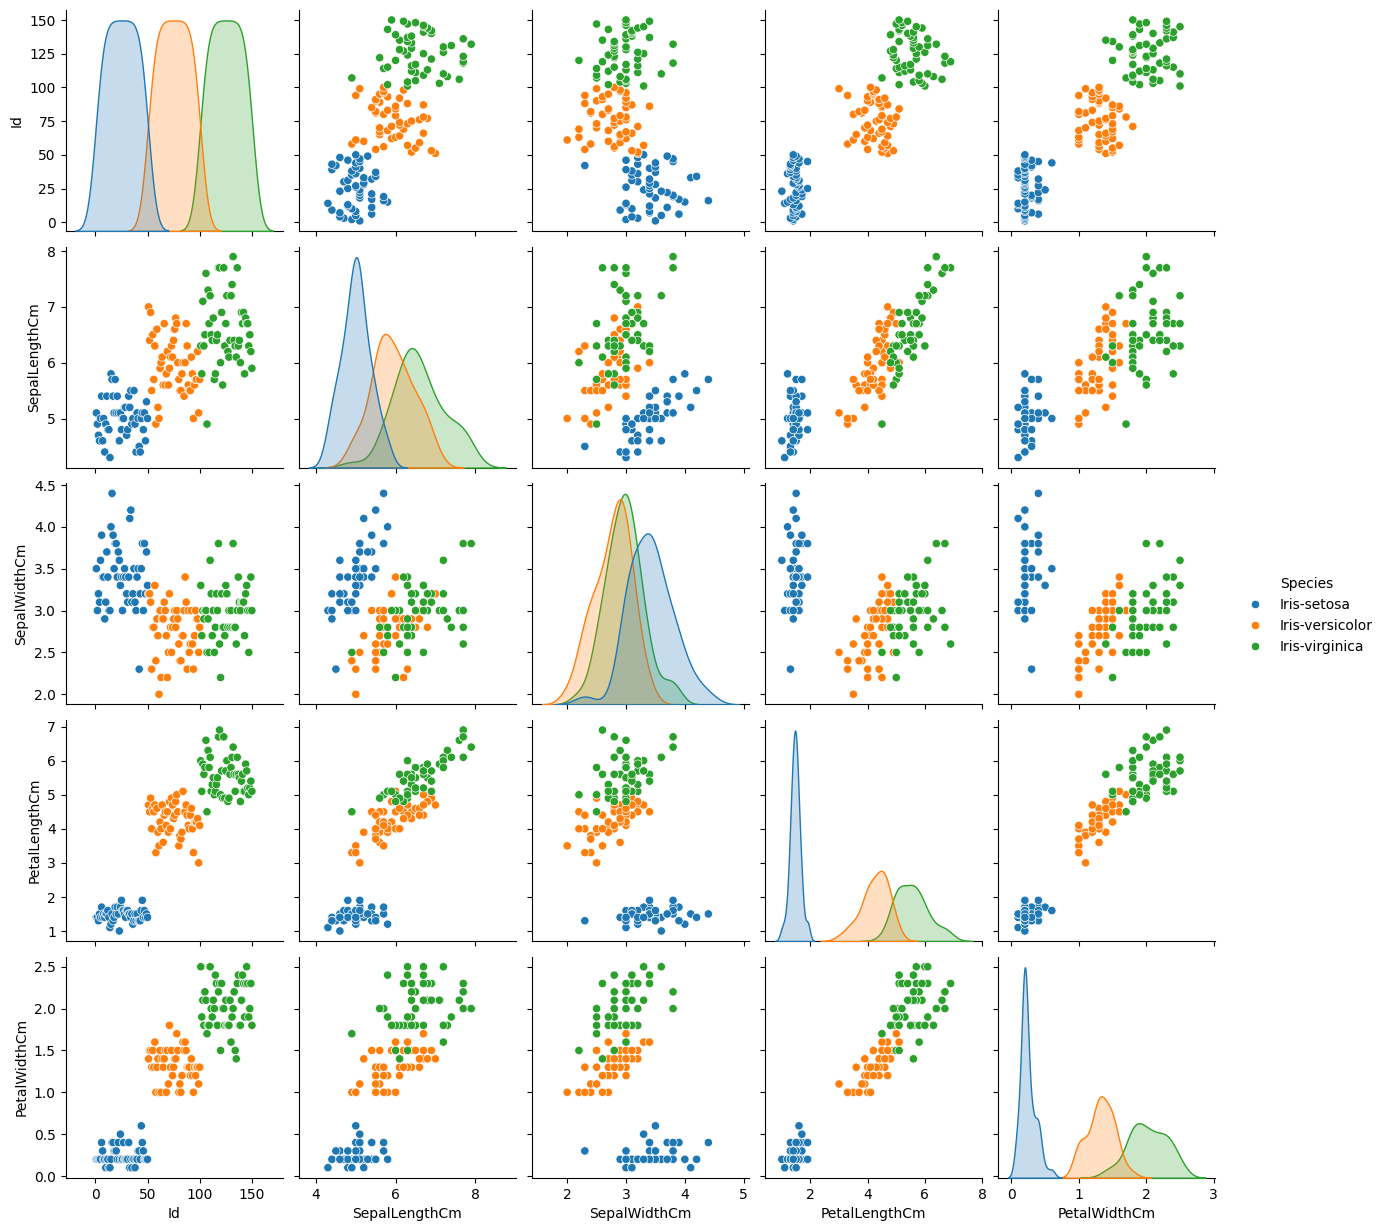

In [ ]:
sns.pairplot(df,hue='Species')

Text(0.5, 1.0, 'SepalLengthCm vs SepalWidthCm')

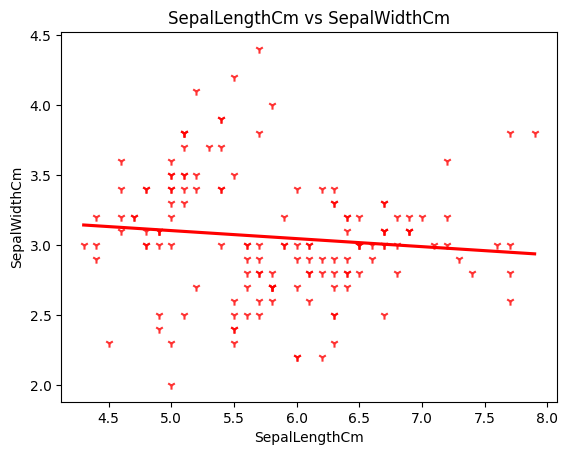

In [ ]:
import matplotlib.pyplot as plt
sns.regplot(data=df,x=df['SepalLengthCm'],y=df['SepalWidthCm'],ci=None,marker='1',color='red')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('SepalLengthCm vs SepalWidthCm')

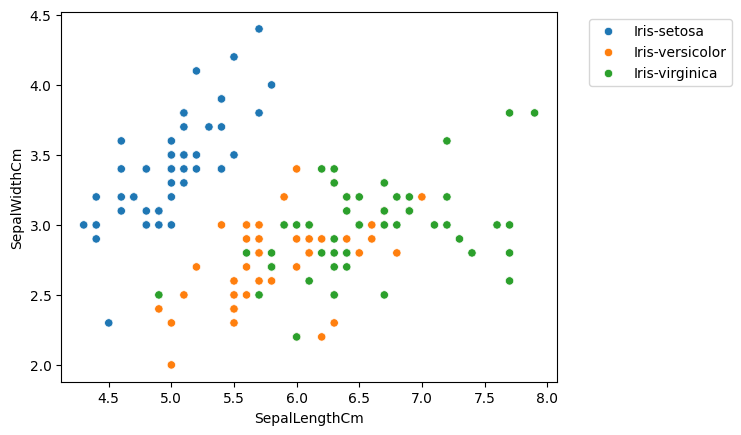

In [ ]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


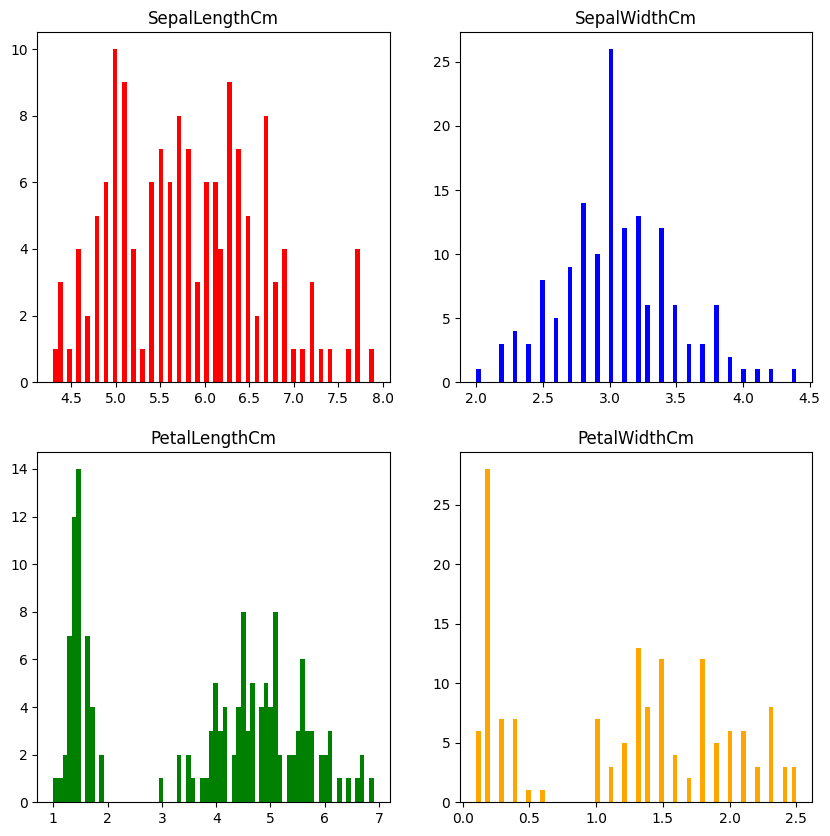

In [ ]:
fig,ax=plt.subplots (2,2, figsize=(10,10))
ax[0,0].set_title("SepalLengthCm")
ax[0,0].hist(df['SepalLengthCm'], bins=70, color="red")
ax[0,1].set_title("SepalWidthCm")
ax[0,1].hist(df['SepalWidthCm'], bins=70,color="blue")
ax[1,0].set_title("PetalLengthCm")
ax[1,0].hist(df['PetalLengthCm'], bins=70,color="green")
ax[1,1].set_title("PetalWidthCm")
ax[1,1].hist(df['PetalWidthCm'], bins=70, color="orange")
plt.show()

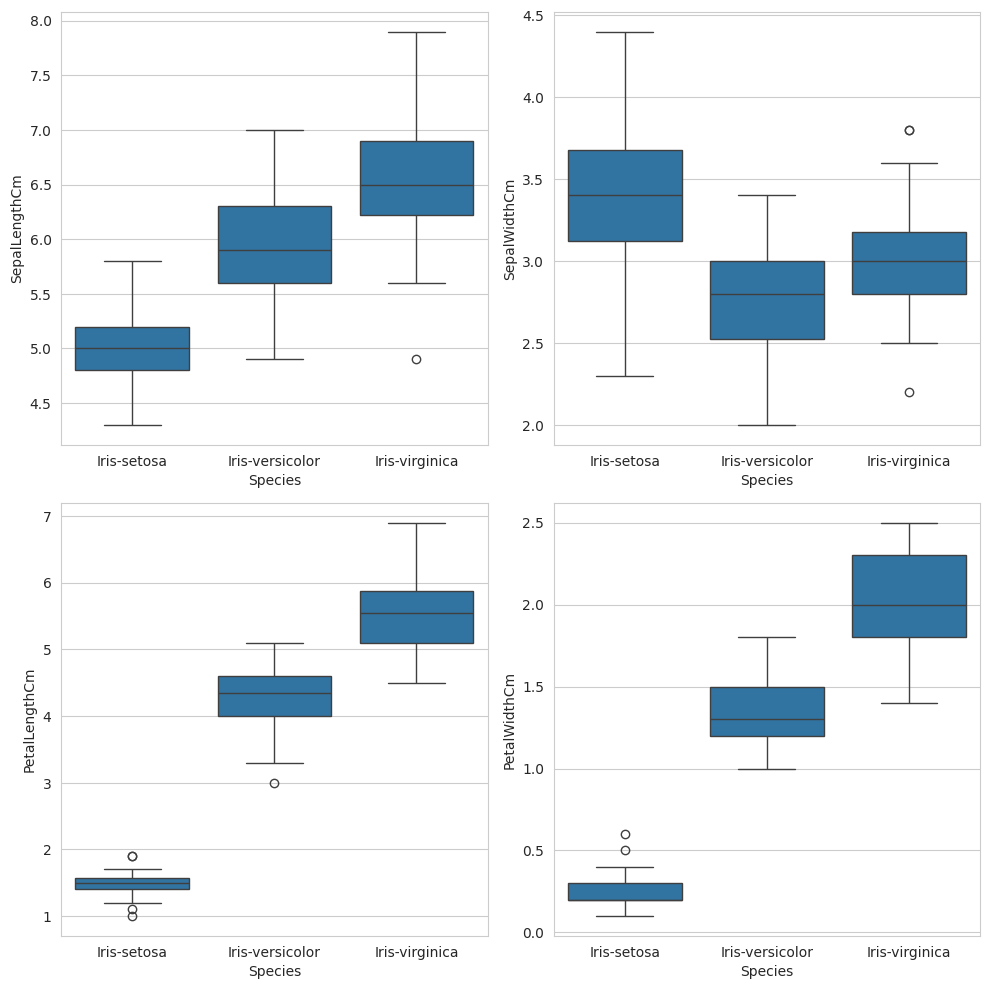

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined

def graph(y):
    sns.boxplot(x='Species', y=y, data=df)

plt.figure(figsize=(10,10))

plt.subplot(221)
graph("SepalLengthCm")

plt.subplot(222)
graph("SepalWidthCm")  #

plt.subplot(223)
graph("PetalLengthCm")

plt.subplot(224)
graph("PetalWidthCm")

plt.tight_layout()
plt.show()


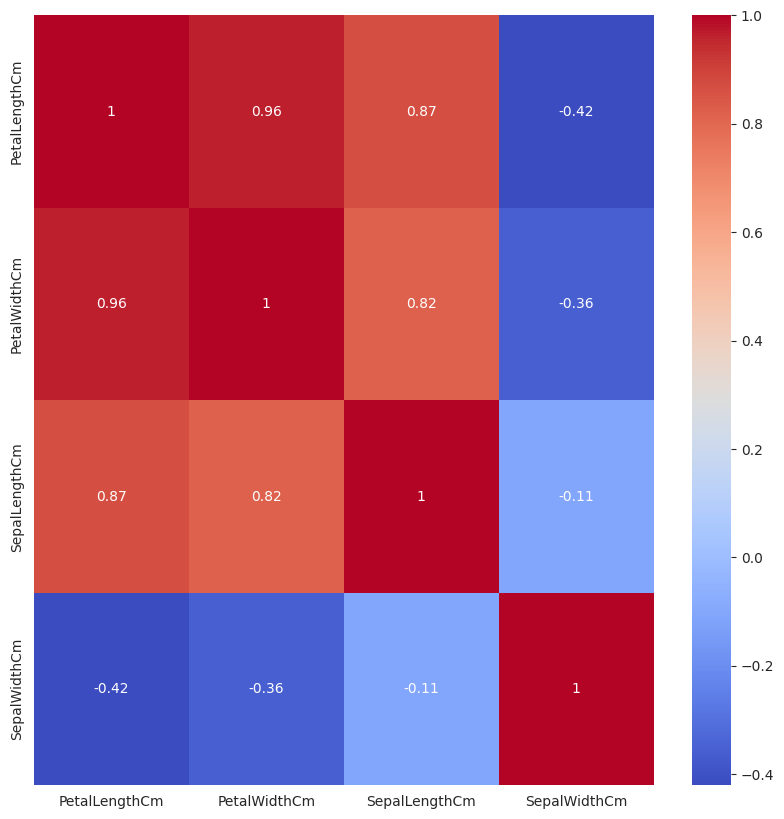

In [ ]:
plt.figure(figsize=(10,10))
corr=df[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data=df.values
X=data[:,0:4]
Y=df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_test)

[[102 5.8 2.7 5.1]
 [73 6.3 2.5 4.9]
 [127 6.2 2.8 4.8]
 [116 6.4 3.2 5.3]
 [135 6.1 2.6 5.6]
 [120 6.0 2.2 5.0]
 [18 5.1 3.5 1.4]
 [51 7.0 3.2 4.7]
 [22 5.1 3.7 1.5]
 [81 5.5 2.4 3.8]
 [30 4.7 3.2 1.6]
 [74 6.1 2.8 4.7]
 [145 6.7 3.3 5.7]
 [32 5.4 3.4 1.5]
 [47 5.1 3.8 1.6]
 [40 5.1 3.4 1.5]
 [57 6.3 3.3 4.7]
 [43 4.4 3.2 1.3]
 [129 6.4 2.8 5.6]
 [115 5.8 2.8 5.1]
 [69 6.2 2.2 4.5]
 [97 5.7 2.9 4.2]
 [141 6.7 3.1 5.6]
 [50 5.0 3.3 1.4]
 [5 5.0 3.6 1.4]
 [2 4.9 3.0 1.4]
 [70 5.6 2.5 3.9]
 [142 6.9 3.1 5.1]
 [134 6.3 2.8 5.1]
 [48 4.6 3.2 1.4]
 [6 5.4 3.9 1.7]
 [90 5.5 2.5 4.0]
 [125 6.7 3.3 5.7]
 [12 4.8 3.4 1.6]
 [131 7.4 2.8 6.1]
 [103 7.1 3.0 5.9]
 [29 5.2 3.4 1.4]
 [101 6.3 3.3 6.0]
 [87 6.7 3.1 4.7]
 [83 5.8 2.7 3.9]
 [85 5.4 3.0 4.5]
 [143 5.8 2.7 5.1]
 [113 6.8 3.0 5.5]
 [44 5.0 3.5 1.6]
 [1 5.1 3.5 1.4]]


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [ ]:
predictions=model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.9333333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
wcss1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df[['PetalLengthCm','PetalWidthCm']])
    wcss1.append(kmeans.inertia_)

In [ ]:
wcss1

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 20.316007803485395,
 14.147293864755932,
 11.056639971910453,
 9.297130812538596,
 8.043872171477286,
 6.773348650891444,
 6.254273015873015]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

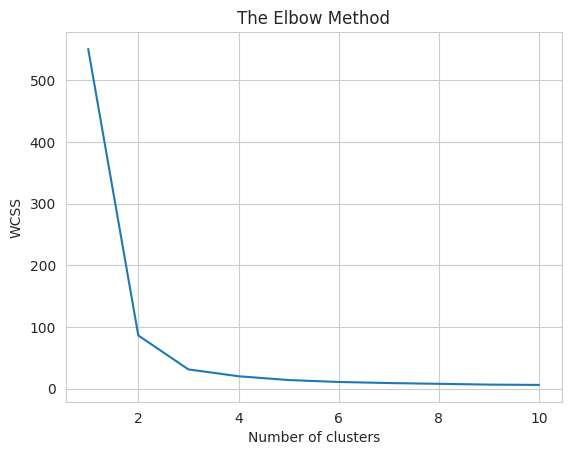

In [ ]:
plt.plot(range(1,11),wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
data_with_cluster1 = df.copy()
data_with_cluster1['cluster'] = kmeans.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
data_with_cluster1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,8
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,8


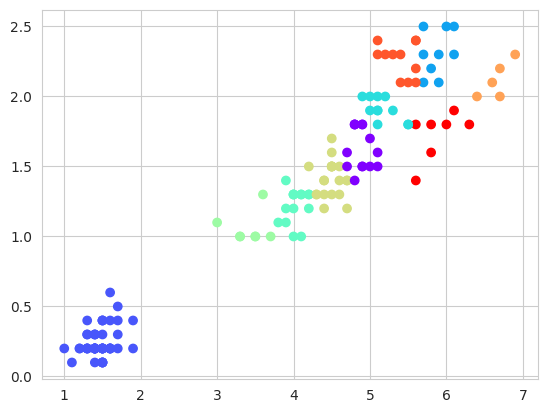

In [ ]:
plt.scatter(data_with_cluster1['PetalLengthCm'],data_with_cluster1['PetalWidthCm'],c=data_with_cluster1['cluster'],cmap='rainbow')
plt.show()